In [28]:
# import scikit-learn K-Means
from sklearn.cluster import KMeans
import numpy as np
from typing import Tuple, Dict
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score

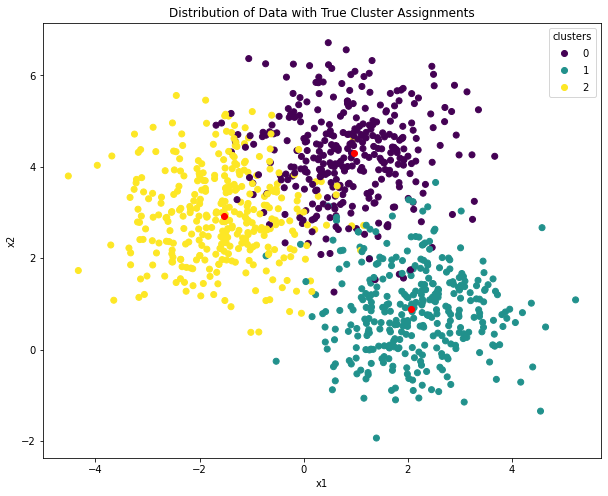

In [29]:
# Memproduksi dataset
X, y, centers = make_blobs(n_samples=1000, centers=3, n_features=2, return_centers=True, random_state=0)

# visualise data
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(X[:,0],X[:,1],c=y)
sc_centers = ax.scatter(centers[:,0],centers[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with True Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

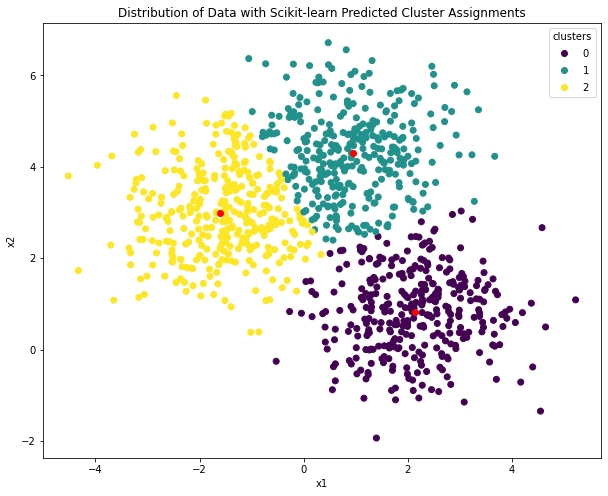

In [30]:
# Buat model KMeans
clt = KMeans(n_clusters=3, max_iter=300, random_state=0)

# Cocokkan model dengan data
clt.fit(X)

# Dapatkan prediksi
y_pred = clt.predict(X)

# Dapatkan prediksi sentroid
centers_pred = clt.cluster_centers_

# Visualisasikan prediksi
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(X[:,0],X[:,1],c=y_pred)
sc_centers = ax.scatter(centers_pred[:,0],centers_pred[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with Scikit-learn Predicted Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()


In [31]:
# Seberapa akurat estimasi sentroid yang dihasilkan?
print(f'The mean absolute error between the predicted and true centroids is: {mean_absolute_error(centers,centers_pred[[1,0,2]])}')

# Kalibrasikan pelabelan (if needed)
idx_0         = y_pred == 0
idx_1         = y_pred == 1
idx_2         = y_pred == 2
y_pred[idx_0] = 1
y_pred[idx_1] = 0
y_pred[idx_2] = 2

# Seberapa akurat penempatan klasterisasi yang dihasilkan? 
acc = accuracy_score(y,y_pred)
pre = precision_score(y,y_pred,average='weighted')
rec = recall_score(y,y_pred,average='weighted')
f1  = f1_score(y,y_pred,average='weighted')
print(f'Accuracy score: {acc:.4f}')
print(f'Precision score: {pre:.4f}')
print(f'Recall score: {rec:.4f}')
print(f'F1 score: {f1:.4f}')

The mean absolute error between the predicted and true centroids is: 0.05823172077110239
Accuracy score: 0.9180
Precision score: 0.9179
Recall score: 0.9180
F1 score: 0.9179
